In [10]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.integrate import solve_ivp
import numpy as np

0.0019091666666666669 0.001125 9.81 0.19900990099009905


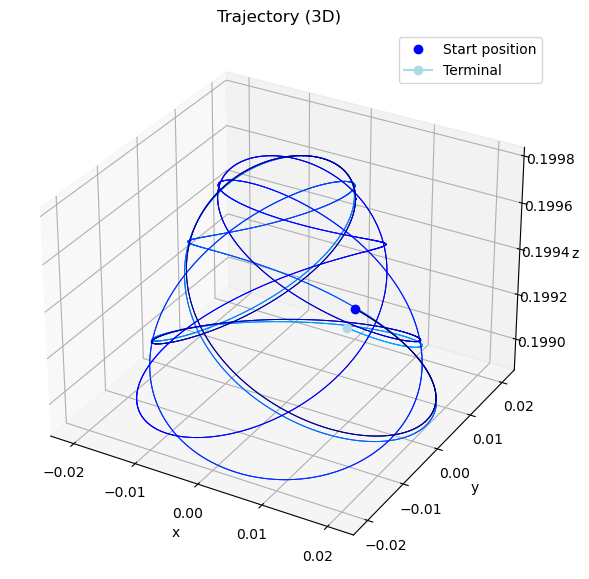

In [11]:
plt.rcParams["figure.figsize"] = (10, 7)
# THIS is a set of init conditions that I did not include in this report

# shape
m1 = 0.1
m2 = 0.001
r = 0.15
l = .2
L = .2
lambda1 = 1/4*m1*r**2 + 1/3*m1*l**2 + 1/3*m2*L**2
lambda3 = 1/2*m1*r**2
m = m1 + m2
R = 1/m*(m1*l + m2*L/2)
g = 9.81
print(lambda1, lambda3, g, R)

# init conditions
phi0 = 0
psi0 = 0
theta0 = 0.1
dottheta0 = 1
v0 = dottheta0
dotphi0 = 20
dotpsi0 = 100

y_init = [phi0, psi0, theta0, v0]
tp = [0, 0.5]
te = np.linspace(tp[0], tp[1], 10001)

# constant
pphi = lambda1*dotphi0*np.sin(theta0)**2 + lambda3*dotphi0*np.cos(theta0)**2 + lambda3*dotpsi0*np.cos(theta0)
ppsi = lambda3*dotpsi0 + lambda3*dotphi0*np.cos(theta0)

def rhs(t, y):
    phi, psi, theta, v = y
    phi_it = (pphi - ppsi*np.cos(theta)) / (lambda1*np.sin(theta)**2)
    psi_it = ppsi/lambda3 - phi_it*np.cos(theta)
    theta_it = v
    v_it = m*g*R*np.sin(theta)/lambda1 + 1 / (lambda1**2*np.sin(theta)**3) \
            * (pphi - ppsi*np.cos(theta)) * (pphi*np.cos(theta) - ppsi)
    #v_it = m*g*R*np.sin(theta)/lambda1 \
    #       + (lambda1-lambda3)/lambda1*((pphi-ppsi*np.cos(theta))/(lambda1*np.sin(theta)**2))**2 * np.sin(theta)*np.cos(theta) \
    #        - lambda3/lambda1 * ((pphi-ppsi*np.cos(theta))/(lambda1*np.sin(theta)**2)) \
    #          * (ppsi/lambda3 - ((pphi-ppsi*np.cos(theta))*np.cos(theta)/(lambda1*np.sin(theta)**2))) * np.sin(theta)
    #v_it = m*g*R*np.sin(theta)/lambda1 + \
    #        + (lambda1-lambda3)/lambda1 * phi_it**2 * np.sin(theta)*np.cos(theta) \
    #        - lambda3/lambda1 * phi_it*psi_it * np.sin(theta)
    return [phi_it, psi_it, theta_it, v_it]


def event(t, y):
    return (np.pi/2 - y[2]) > 0
event.direction = 1
event.terminal = True


# rotation matrix
def rotate(vec, phi, theta, psi):
    Rphi = np.array([[np.cos(phi), np.sin(phi), 0],
                     [-np.sin(phi), np.cos(phi), 0],
                     [0, 0, 1]])
    Rtheta = np.array([[1, 0, 0],
                       [0, np.cos(theta), np.sin(theta)],
                       [0, -np.sin(theta), np.cos(theta)]])
    Rpsi = np.array([[np.cos(psi), np.sin(psi), 0],
                       [-np.sin(psi), np.cos(psi), 0],
                       [0, 0, 1]])
    vec = np.dot(Rphi, vec)#Rphi.dot(vec)
    vec = np.dot(Rtheta, vec)
    vec = np.dot(Rpsi, vec)
    return vec


sol = solve_ivp(rhs, t_span=tp, y0=y_init, t_eval=te, events=event)
phis, psis, thetas, vs = sol.y

idx = -1
for i in range(len(phis)):
    if thetas[i] > np.pi / 2:
        idx = i
        break
phis = phis[:idx]
psis = psis[:idx]
thetas = thetas[:idx]

ref_pt = np.array([0, 0, L])
points = [rotate(ref_pt, phi, theta, psi) for phi, psi, theta in zip(phis, psis, thetas)]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trajectory (3D)')
xline = [p[0] for p in points]
yline = [p[1] for p in points]
zline = [p[2] for p in points]

for i in range(len(xline) - 1, -1, -1):
    ax.plot(xline[i:i+2], yline[i:i+2], zline[i:i+2], color=plt.cm.jet((i/len(xline))/3.5), linewidth=0.7)

#ax.plot3D(xline, yline, zline, 'darkgrey', label='Path', linewidth=0.7)
ax.plot3D(xline[0], yline[0], zline[0], 'bo', label='Start position')
ax.plot3D(xline[-1], yline[-1], zline[-1], color='lightblue', marker='o', label='Terminal')
ax.legend()

Text(0.5, 0, 't')

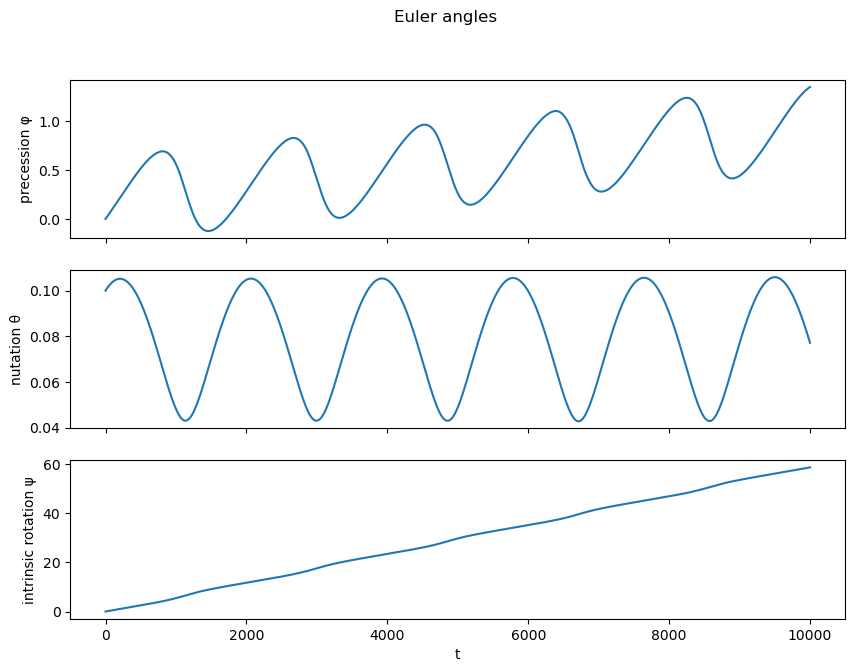

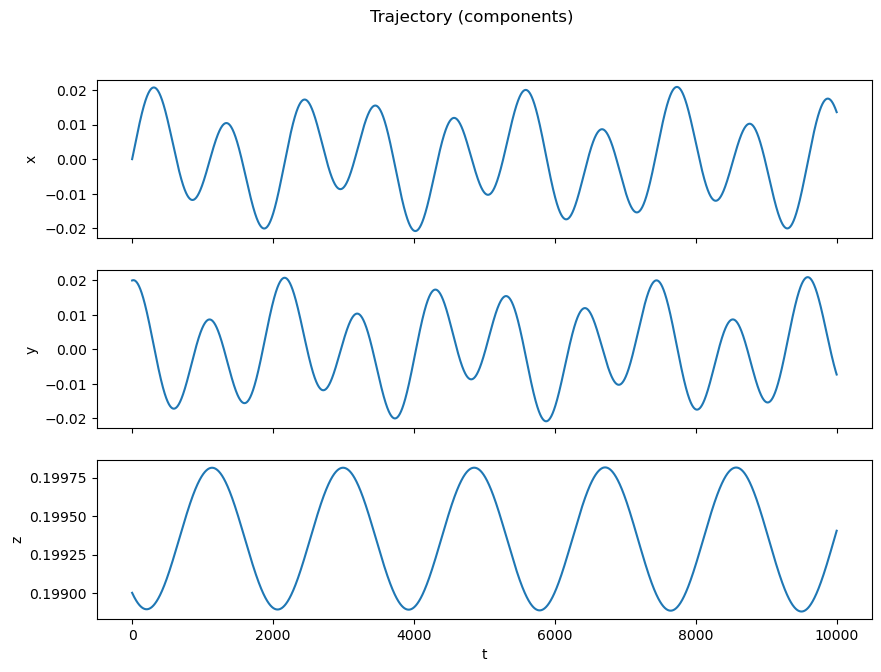

In [12]:
fig = plt.figure()
fig.suptitle('Euler angles')
gs = fig.add_gridspec(3, hspace=0.2)
ax1, ax2, ax3 = gs.subplots(sharex=True)
ax1.set_ylabel('precession φ')
ax1.plot(phis)
ax2.set_ylabel('nutation θ')
ax2.plot(thetas)
ax3.set_ylabel('intrinsic rotation ψ')
ax3.plot(psis)
ax3.set_xlabel('t')

fig = plt.figure()
fig.suptitle('Trajectory (components)')
gs = fig.add_gridspec(3, hspace=0.2)
ax1, ax2, ax3 = gs.subplots(sharex=True)
ax1.set_ylabel('x')
ax1.plot(xline)
ax2.set_ylabel('y')
ax2.plot(yline)
ax3.set_ylabel('z')
ax3.plot(zline)
ax3.set_xlabel('t')